In [14]:
import numpy as np
w = np.zeros((10,64))
average_filters_num = 6
common = 64 - average_filters_num * 10
print(common)
for i in range(10):
    w[i , i*average_filters_num : (i+1)*average_filters_num] = 1
w[:,-common:] = 1

class_num = 10
channel_num = 64
count_for_one = 0.95
count_for_share = 0.5

w_count = []
class_c_relation = np.zeros((class_num, class_num), int)
for i in range(class_num):
    w_count += [sum(w[i,:]>count_for_one)]

for i in range(channel_num):
    relation = w[:,i] > count_for_share
    for idx1 in range(class_num):
        for idx2 in range(class_num):
            if(relation[idx1] == True and relation[idx2] == True):
                class_c_relation[idx1][idx2] = 1
    np.fill_diagonal(class_c_relation, 0)
    
print('average/var for each class', np.average(w_count),np.var(w_count) )
print('average/var for share class', np.average(class_c_relation),np.var(class_c_relation))
    
print(w_count)
print(class_c_relation)



4
average/var for each class 10.0 0.0
average/var for share class 0.9 0.09
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


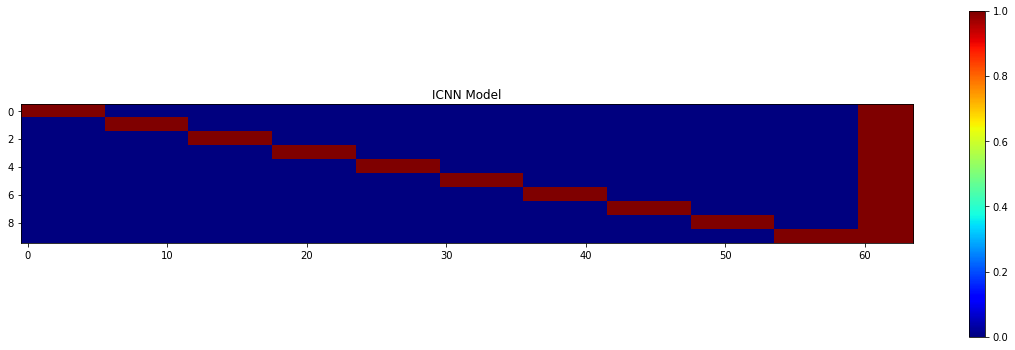

In [15]:
import matplotlib.pyplot as plt    # 绘图库
import os
weights = w
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
im = ax.imshow(weights,cmap=plt.cm.jet)
plt.colorbar(im,orientation='vertical')
plt.title('ICNN Model')
plt.show()